In [1]:
import numpy as np
import importlib, random
import matplotlib.pyplot as plt
%matplotlib inline

Reload our modules to pick up code changes:

In [2]:
import grid_world, sarsa
grid_world = importlib.reload(grid_world)
sarsa = importlib.reload(sarsa)

# Sarsa and GridWorld

In [3]:
env = grid_world.GridWorld()
agent = sarsa.SarsaAgent(env)

Train the agent:

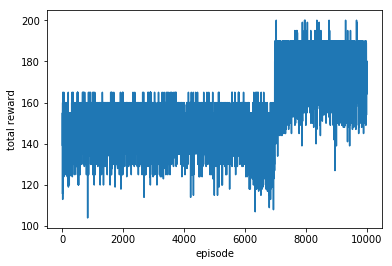

In [4]:
epsilon = 0.1
alpha = 0.1
gamma = 0.9
episode_max_length = 100
num_episodes = 10000
rewards = agent.train(epsilon, alpha, gamma, episode_max_length, num_episodes)
plt.plot(rewards)
plt.xlabel('episode')
plt.ylabel('total reward');

Visualize the resulting greedy policy:

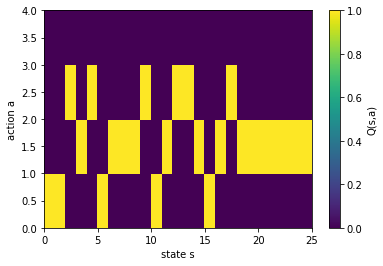

In [5]:
greedy_actions = agent.Q.argmax(axis=1)
Qmax = np.zeros_like(agent.Q)
Qmax[range(agent.Q.shape[0]), greedy_actions] = 1
plt.pcolor(Qmax.T)
plt.xlabel('state s')
plt.ylabel('action a')
cbar = plt.colorbar()
cbar.set_label('Q(s,a)')

Raw Q values:

In [6]:
agent.Q

array([[20.1355663 , 16.91922517, 16.56843651, 15.56832665],
       [22.71882567, 22.09249948, 22.04230143, 21.84208846],
       [15.89926028, 16.31739539, 20.05398383, 15.78571625],
       [17.33048964, 17.66556598, 17.42119451, 17.39284572],
       [12.74376679, 12.7906524 , 15.84580207, 11.91152698],
       [17.8767758 , 17.27286758, 14.75125132, 13.88769165],
       [16.08731637, 20.25965081, 15.94409728, 15.3695281 ],
       [14.12766049, 18.02549474, 17.25179496, 13.93988358],
       [12.6832069 , 15.80147319, 15.62517306, 12.59602324],
       [11.39949968, 13.6559105 , 14.21694942, 10.60698693],
       [15.78821161, 15.29145698, 13.19029656, 12.49247171],
       [14.20586353, 17.83200355, 14.21361723, 13.54139055],
       [12.49092123, 15.48831537, 15.58018346, 12.42092806],
       [11.19220648, 13.96013726, 14.23240495, 11.4056795 ],
       [10.09281609, 12.71565091, 11.98356698,  9.80736697],
       [14.28409417, 13.67410197, 11.65604932, 11.11330029],
       [12.70425888, 16.

Visualize the greedy policy as movement on the grid:

In [7]:
def policy_as_string():
    output = ''
    k = 0
    for i in range(5):
        for j in range(5):
            s = i*5 + j
            a = agent.Q[s,:].argmax()
            c = ['>','^','<','v'][a]
            output += c
            k += 1
        output += '\n'
    return output

In [8]:
print(policy_as_string())

>><^<
>^^^<
>^<<^
>^<^^
^^^^^



Visualize an example trajectory:

total reward = 195.0


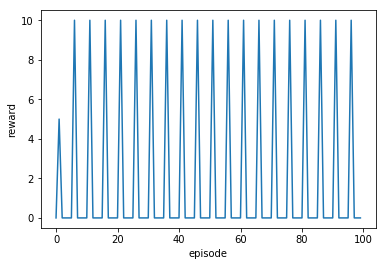

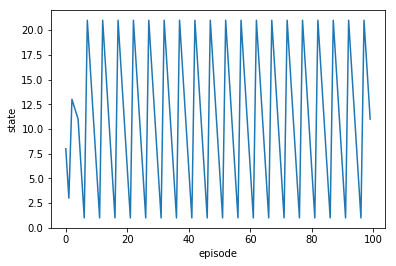

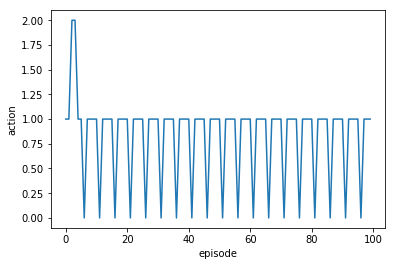

In [12]:
(rewards, states, actions) = agent.enjoy(episode_max_length)
print(f'total reward = {rewards.sum()}')
####
plt.plot(rewards)
plt.xlabel('episode')
plt.ylabel('reward')
####
plt.figure()
plt.plot(states)
plt.xlabel('episode')
plt.ylabel('state')
####
plt.figure()
plt.plot(actions)
plt.xlabel('episode')
plt.ylabel('action');